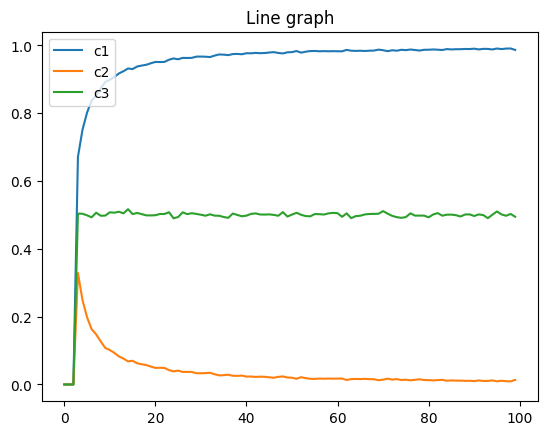

In [1]:
import numpy as np
import matplotlib.pyplot as plt 




n = 100       #number of doors
c1_winrate = np.empty(n)
c1_winrate.fill(0)
c2_winrate = np.empty(n)
c2_winrate.fill(0)
c3_winrate = np.empty(n)
c3_winrate.fill(0)

tries = 10000


for j in range(3, n, 1):

    c1_score = 0
    c2_score = 0
    c3_score = 0

    for i in range(tries):
        door = np.random.randint(0, j)

        c1 = np.random.randint(0, j)    #always switch
        c2 = c1                         #always keep

        doors = np.arange(0, n)     #initialize doors

        wrong_doors = np.delete(doors, door)    #2 wrong doors, needed to choose which one not to open

        unchosen_doors = np.delete(doors, c1)   #unchosen doors, nedeed for c1 to always switch

        possible_doors = np.delete(wrong_doors, np.where(wrong_doors == c1))    #doors that can be opened, can be 1 or 2 doors     
    
        unopened_doors = np.arange(1, 3)        #the main difference is tha instead of choosing a door to open we choose which door stays closed
        unopened_doors[0] = door
        unopened_doors[1] = np.random.choice(possible_doors)        #note that possible doors is a subset of wrong doors

        c1_door = np.delete(unopened_doors, np.where(unopened_doors == c1))
        c1 = c1_door[0]

        c3 = np.random.choice(unopened_doors)

        if c1 == door: c1_score = c1_score + 1
        if c2 == door: c2_score = c2_score + 1
        if c3 == door: c3_score = c3_score + 1

        c1_winrate[j] = float(c1_score/tries)
        c2_winrate[j] = float(c2_score/tries)
        c3_winrate[j] = float(c3_score/tries)


plt.title("Line graph") 
plt.plot(c1_winrate, label = "c1")
plt.plot(c2_winrate, label = "c2")
plt.plot(c3_winrate, label = "c3")
plt.legend()
plt.show()

